# Métricas de Clustering - alternativas al método del elbow
### Dr. Tirthajyoti Sarkar, Fremont, CA 94536

La agrupación (clustering) es una parte importante del proceso de aprendizaje automático tanto para las empresas comerciales o científicas que utilizan la ciencia de datos. Como su nombre indica, la agrupación ayuda a identificar congregaciones de puntos de datos estrechamente relacionados (por alguna medida de distancia) en un conjunto de datos que, de otro modo, sería difícil entender.

Un método tan popular como el clustering de k-means no parece ofrecer una respuesta completamente satisfactoria cuando nos planteamos la pregunta básica: 
> **¿Cómo podemos saber, para empezar, el número real de clústers?**

Esta cuestión es de vital importancia, ya que el proceso de agrupación suele ser precursor del tratamiento posterior de los datos de los clústeres individuales y, por lo tanto, la cantidad de recursos informáticos puede depender de esta medición.

En el caso de un problema de análisis empresarial, la repercusión podría ser peor. Para este tipo de análisis, a menudo se realizan agrupaciones con el objetivo de segmentar el mercado. Por tanto, es fácilmente concebible que, en función del número de clústers, se asigne al problema el personal de marketing adecuado. En consecuencia, una evaluación errónea del número de clústers puede conducir a una asignación subóptima de recursos valiosos.

Para el método de agrupación de k-means, el enfoque más común para responder a esta pregunta es el llamado método del codo. Consiste en ejecutar el algoritmo varias veces a lo largo de un bucle, con un número creciente de clústeres elegidos y, a continuación, trazar una puntuación de agrupación en función del número de clústeres.

En este cuaderno, mostramos qué métrica utilizar para visualizar y determinar un número óptimo de conglomerados mucho mejor que la práctica habitual - el método del Elbow.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Creación de datos sintéticos usando Scikit learn `make_blob` method

- Número de características: 4
- Número de clusters: 5
- Número de instancias: 200

In [ ]:
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [ ]:
n_features = 4
n_cluster = 5
cluster_std = 1.2
n_samples = 200

In [ ]:
data1 = make_blobs(n_samples=n_samples,n_features=n_features,centers=n_cluster,cluster_std=cluster_std)

In [ ]:
d1 = data1[0]

In [ ]:
df1=pd.DataFrame(data=d1,columns=['Feature_'+str(i) for i in range(1,n_features+1)])
df1.head()

Feature_1  Feature_2  Feature_3  Feature_4
0   1.801901   3.605896   4.369392   2.325192
1  -6.901915 -10.952801  -5.004106   0.308243
2   0.016578   1.299328  -8.264865  -7.548624
3   2.053912   3.702495   4.520239   3.023131
4   2.806206  -6.826686  -8.700822   5.238822

Combinaciones posibles de todas las features dos a dos

In [ ]:
from itertools import combinations

In [ ]:
lst_vars=list(combinations(df1.columns,2))

In [ ]:
len(lst_vars)

6

Visualización

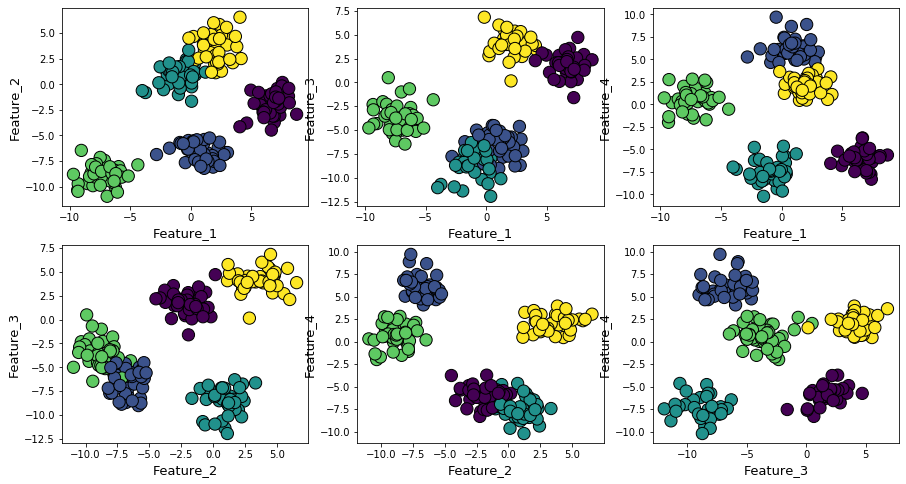

In [ ]:
plt.figure(figsize=(15,8))
for i in range(1,7):
    plt.subplot(2,3,i)
    dim1=lst_vars[i-1][0]
    dim2=lst_vars[i-1][1]
    plt.scatter(df1[dim1],df1[dim2],c=data1[1],edgecolor='k',s=150)
    plt.xlabel(f"{dim1}",fontsize=13)
    plt.ylabel(f"{dim2}",fontsize=13)

### Cómo están separadas las clases (boxplots)

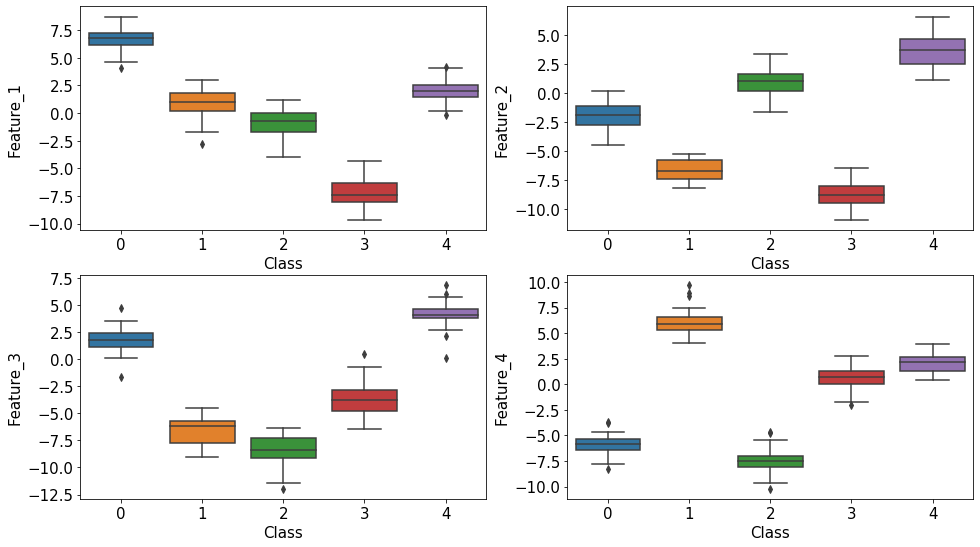

In [ ]:
plt.figure(figsize=(16,14))
for i,c in enumerate(df1.columns):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=df1[c],x=data1[1])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel("Class",fontsize=15)
    plt.ylabel(c,fontsize=15)
    #plt.show()

## k-means clustering

In [ ]:
from sklearn.cluster import KMeans

### Datos no etiquetados

In [ ]:
X=df1

In [ ]:
X.head()

Feature_1  Feature_2  Feature_3  Feature_4
0   1.801901   3.605896   4.369392   2.325192
1  -6.901915 -10.952801  -5.004106   0.308243
2   0.016578   1.299328  -8.264865  -7.548624
3   2.053912   3.702495   4.520239   3.023131
4   2.806206  -6.826686  -8.700822   5.238822

In [ ]:
y=data1[1]

### Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_scaled=scaler.fit_transform(X)

### Métricas

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

### Ejecutando k-means and calculado el inter-cluster distance score para varios valores de *k*

In [ ]:
km_scores= []
km_silhouette = []
vmeasure_score =[]
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    v_measure = v_measure_score(y,preds)
    vmeasure_score.append(v_measure)
    print("V-measure score for number of cluster(s) {}: {}".format(i,v_measure))
    print("-"*100)

Score for number of cluster(s) 2: -30.352003414553124
Silhouette score for number of cluster(s) 2: 0.45936723608066826
Davies Bouldin score for number of cluster(s) 2: 1.0093937644665807
V-measure score for number of cluster(s) 2: 0.5897275217561558
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 3: -16.1340246424723
Silhouette score for number of cluster(s) 3: 0.5779386568713396
Davies Bouldin score for number of cluster(s) 3: 0.6958113982658629
V-measure score for number of cluster(s) 3: 0.7918756684685209
----------------------------------------------------------------------------------------------------
Score for number of cluster(s) 4: -9.28898992833155
Silhouette score for number of cluster(s) 4: 0.6631543270567946
Davies Bouldin score for number of cluster(s) 4: 0.5094494331888024
V-measure score for number of cluster(s) 4: 0.905746099275519
-------------------------------------------------------

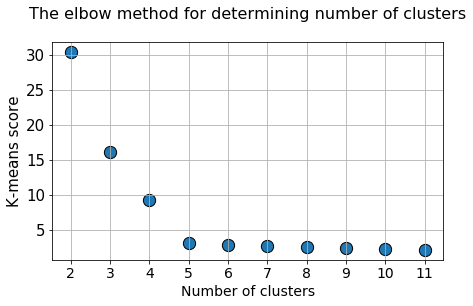

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

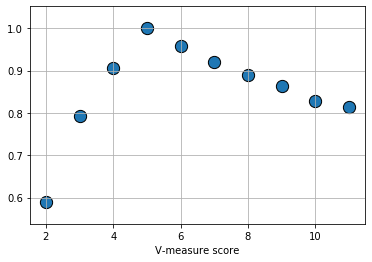

In [ ]:
plt.scatter(x=[i for i in range(2,12)],y=vmeasure_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("V-measure score")
plt.show()

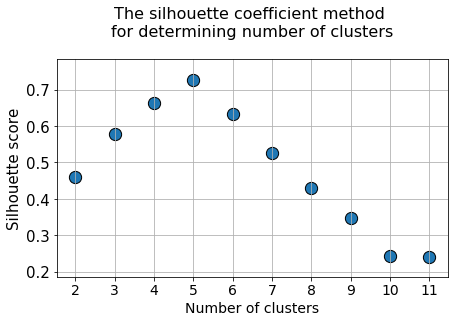

In [ ]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(2,12)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

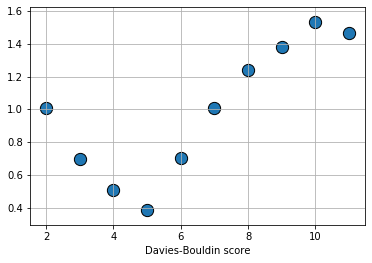

In [ ]:
plt.scatter(x=[i for i in range(2,12)],y=db_score,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Davies-Bouldin score")
plt.show()